In [ ]:
# important libraries
import numpy as np
import pandas as pd
import pandas_datareader as pdr 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# New Section

In [ ]:
# read data
data = pd.read_csv('/Fat_Supply_Quantity_Data.csv') 
# showing top 5 rows
data.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0,0.0,0.7513,28.3684,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0,0.0,0.9181,17.9998,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0,0.0,0.8595,35.5857,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0,0.0,0.0308,34.7010,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0,0.0,0.2020,22.2995,14.4436,0.2469,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [ ]:
# columns name
data.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

In [ ]:
# total columns
data.columns.size

32

In [ ]:
# Let's drop the last column as it is just a unit information
data = data.drop('Unit (all except Population)', axis = 1)
data.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0,0.0,0.7513,28.3684,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0,0.0,0.9181,17.9998,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0,0.0,0.8595,35.5857,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0,0.0,0.0308,34.7010,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0,0.0,0.2020,22.2995,14.4436,0.2469,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0


In [ ]:
# checking NaN Values in the dataset
data.isnull().sum()

Country                     0
Alcoholic Beverages         0
Animal Products             0
Animal fats                 0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Miscellaneous               0
Milk - Excluding Butter     0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar Crops                 0
Sugar & Sweeteners          0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Obesity                     3
Undernourished              7
Confirmed                   6
Deaths                      6
Recovered                   6
Active                      8
Population                  0
dtype: int64

In [ ]:
data.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0,0.0,0.7513,28.3684,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0,0.0,0.9181,17.9998,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0,0.0,0.8595,35.5857,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0,0.0,0.0308,34.7010,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0,0.0,0.2020,22.2995,14.4436,0.2469,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0


In [ ]:
# Drop NaN values
data = data.dropna()

In [ ]:
# columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 169
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   154 non-null    object 
 1   Alcoholic Beverages       154 non-null    float64
 2   Animal Products           154 non-null    float64
 3   Animal fats               154 non-null    float64
 4   Aquatic Products, Other   154 non-null    float64
 5   Cereals - Excluding Beer  154 non-null    float64
 6   Eggs                      154 non-null    float64
 7   Fish, Seafood             154 non-null    float64
 8   Fruits - Excluding Wine   154 non-null    float64
 9   Meat                      154 non-null    float64
 10  Miscellaneous             154 non-null    float64
 11  Milk - Excluding Butter   154 non-null    float64
 12  Offals                    154 non-null    float64
 13  Oilcrops                  154 non-null    float64
 14  Pulses    

In [ ]:
data['Undernourished'][:20]

0     29.8
1      6.2
2      3.9
3       25
5      4.6
6      4.3
7     <2.5
8     <2.5
9     <2.5
11    14.7
12     3.9
13    <2.5
14    <2.5
15     7.5
16    10.1
17    17.1
18    <2.5
19    26.4
20    <2.5
21     3.6
Name: Undernourished, dtype: object

In [ ]:
data['Undernourished'][0]

'29.8'

In [ ]:
data.loc[data['Undernourished'] == '<2.5', 'Undernourished'] = '2.0'

#OK, so we have strings and some of them are of the form '<2.5'. Let's replace these values with '2.0', as a very crude way of dealing with these values. 
# We need to remember, in the analysis, that all values '2.0' represent something below 2.5.

In [ ]:
data['Undernourished'][:20] # Now, to turn data into numeric types:

0     29.8
1      6.2
2      3.9
3       25
5      4.6
6      4.3
7      2.0
8      2.0
9      2.0
11    14.7
12     3.9
13     2.0
14     2.0
15     7.5
16    10.1
17    17.1
18     2.0
19    26.4
20     2.0
21     3.6
Name: Undernourished, dtype: object

In [ ]:
data['Undernourished'] = pd.to_numeric(data['Undernourished'])

In [ ]:
data.info() # Now we have no missing values and all data is numeric, except for country names.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 169
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   154 non-null    object 
 1   Alcoholic Beverages       154 non-null    float64
 2   Animal Products           154 non-null    float64
 3   Animal fats               154 non-null    float64
 4   Aquatic Products, Other   154 non-null    float64
 5   Cereals - Excluding Beer  154 non-null    float64
 6   Eggs                      154 non-null    float64
 7   Fish, Seafood             154 non-null    float64
 8   Fruits - Excluding Wine   154 non-null    float64
 9   Meat                      154 non-null    float64
 10  Miscellaneous             154 non-null    float64
 11  Milk - Excluding Butter   154 non-null    float64
 12  Offals                    154 non-null    float64
 13  Oilcrops                  154 non-null    float64
 14  Pulses    

In [ ]:
fig = px.scatter(data, x="Confirmed", y = "Deaths",size = "Active", hover_name='Country', log_x=False,
                 size_max=30, trendline = "ols", marginal_x = "box",marginal_y = "violin", template="simple_white")
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Here, the size of points corresponds to the active cases of COVID-19. As expected, there is a tendency of having more deaths where more confirmed cases are present.

# Now, to understand the dataset a bit more clearly, let's do some sanity checks.

In [ ]:
data.iloc[:,1:24] = data.iloc[:, 1:24] * 2

In [ ]:
#That fixed the issue. Now, let's do some sanity checks with the COVID-19 categories.

#Columns related to this are: 'Confirmed', 'Deaths', 'Recovered', 'Active'.

#If my understanding is correct, the number of confirmed cases should be the sum of deaths, recoverd and active. Let's investigate.

In [ ]:
(data['Confirmed'] - (data['Deaths'] + data['Recovered'] + data['Active'])).round(2)

0     -0.0
1      0.0
2      0.0
3      0.0
5      0.0
      ... 
165    0.0
166   -0.0
167   -0.0
168    0.0
169    0.0
Length: 154, dtype: float64

In [ ]:
# Great! Our understanding is correct.

# To further investigate the impact of deaths by COVID-19, we will create a column Mortality which will be calculated as Deaths by Confirmed.

In [ ]:
data['Mortality'] = data['Deaths']/data['Confirmed']

data['Mortality']

0      0.043521
1      0.017171
2      0.026779
3      0.023677
5      0.024845
         ...   
165    0.009472
166    0.017632
167    0.289140
168    0.013658
169    0.038159
Name: Mortality, Length: 154, dtype: float64

In [ ]:
# Next, we'll look at some general distributions from the COVID-19 data:

In [ ]:
# Distributions

fig = px.bar(data, x = "Country", y ="Confirmed").update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
# Distributions
fig = px.bar(data, x = "Country", y ="Deaths").update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
# Distributions
fig = px.bar(data, x = "Country", y ="Active").update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
# Distributions
fig = px.bar(data, x = "Country", y ="Mortality").update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
# From this last figure, we can see that Yemen stands out as having a very alarming mortality (almost  30% ). 
# However, Yemen also appears as one of the lowest death rate countries (death rate of 0.001955).

In [ ]:
data[data.Country == 'Yemen']['Deaths']

167    0.002062
Name: Deaths, dtype: float64

Investigate: does obesity rate affect impact of COVID-19?
From the authors:

Since the pandemic began, dozens of studies have reported that many of the sickest COVID-19 patients have been people with obesity. In recent weeks, that link has come into sharper focus as large new population studies have cemented the association and demonstrated that even people who are merely overweight are at higher risk.

Our hypothesis is that we can find a pattern from this datset supporting this report. To do so, we'll start by simply plotting the Obesity rate against our newly defined Mortality.

In [ ]:
fig = px.scatter(data[data.Country != 'Yemen'], x="Mortality", y = "Obesity", size = "Active", hover_name='Country', log_x=False,
                 size_max=30, template="simple_white")

fig.add_shape(
        # Line Horizontal
            type="line",
            x0=0,
            y0=data[data.Country != 'Yemen']['Obesity'].mean(),
            x1=data[data.Country != 'Yemen']['Mortality'].max(),
            y1=data[data.Country != 'Yemen']['Obesity'].mean(),
            line=dict(
                color="crimson",
                width=4
            ),
    )


fig.show()

In [ ]:
# The red line represents the avergae obesity rate among countries. In this analysis, we have excluded "Yemen", as it was far above the "main cluster" 
# of other countries. To clarify, here is the same graph including "Yemen":

In [ ]:
fig = px.scatter(data, x="Mortality", y = "Obesity", size = "Active", hover_name='Country', log_x=False,
                 size_max=30, template="simple_white")

fig.add_shape(
        # Line Horizontal
            type="line",
            x0=0,
            y0=data['Obesity'].mean(),
            x1=data['Mortality'].max(),
            y1=data['Obesity'].mean(),
            line=dict(
                color="crimson",
                width=4
            ),
    )


fig.show()

In [ ]:
fig = px.scatter(data, x="Deaths", y = "Obesity", size = "Mortality",
                 hover_name='Country', log_x=False, size_max=30, template="simple_white")

fig.add_shape(
        # Line Horizontal
            type="line",
            x0=0,
            y0=data['Obesity'].mean(),
            x1=data['Deaths'].max(),
            y1=data['Obesity'].mean(),
            line=dict(
                color="crimson",
                width=4
            ),
    )

fig.show()

In [ ]:
# In this figure, the size of the points correspond to the country's COVID-19 mortality. Here we can see that Yemen indeed stands out as having a big
#  mortality (the huge point just bellow the mean obesity red line).


In [ ]:
data[data.Obesity < data['Obesity'].mean()].shape
data[data.Obesity > data['Obesity'].mean()].shape

(93, 32)

Our finding: The "high mortality" and "high death rate" countries all seem to have an above average obesity rate.

Distribution of food intake (in kg) - exploring high obesity cases
Let's inspect this further. What can we say about the food intake in countries grouped by obesity rate?

In [ ]:
df_high_ob = data[data.Obesity > data['Obesity'].mean()]
df_low_ob = data[data.Obesity <= data['Obesity'].mean()]

In [ ]:
data['ObesityAboveAvg'] = (data["Obesity"] > data['Obesity'].mean()).astype(int)

In [ ]:
# We have created a column ObesityAboveAvg that has value 1 if the country has obesity rate above the mean of all other countries, and 0 otherwise

In [ ]:
fig = px.histogram(data, x = "Animal Products", nbins=50, color = "ObesityAboveAvg", marginal="rug")

fig.add_shape(
        # Mean value of Animal Products intake in low obesity countries
            type="line",
            x0=df_low_ob['Animal Products'].median(),
            y0=0,
            x1=df_low_ob['Animal Products'].median(),
            y1=12,
            line=dict(
                color="darkblue",
                width=4
            ),
    )

fig.add_shape(
        # Mean value of Animal Products intake in high obesity countries
            type="line",
            x0=df_high_ob['Animal Products'].median(),
            y0=0,
            x1=df_high_ob['Animal Products'].median(),
            y1=12,
            line=dict(
                color="crimson",
                width=4
            ),
    )



fig.show()

In [ ]:
fig = px.histogram(data, x = "Vegetal Products", nbins=50, color = "ObesityAboveAvg", marginal="rug")

fig.add_shape(
        # Mean value of Vegetal Products intake in low obesity countries
            type="line",
            x0=df_low_ob['Vegetal Products'].median(),
            y0=0,
            x1=df_low_ob['Vegetal Products'].median(),
            y1=12,
            line=dict(
                color="darkblue",
                width=4
            ),
    )

fig.add_shape(
        # Mean value of Vegetal Products intake in high obesity countries
            type="line",
            x0=df_high_ob['Vegetal Products'].median(),
            y0=0,
            x1=df_high_ob['Vegetal Products'].median(),
            y1=12,
            line=dict(
                color="crimson",
                width=4
            ),
    )

fig.show()

In [ ]:
# This might be a naive first analysis, but countries with obesity rates above the mean of all countries have a higher consumption of Animal Products and lower consuption of Vegetal Products.
# The vertical lines in both figures represent the median value of intake for each group

In [ ]:
fig = px.bar(data, x = "Country", y ="Deaths", facet_col = "ObesityAboveAvg")
fig.update_xaxes(matches=None,categoryorder="total descending")
fig.show()

In [ ]:
# In the figure above, we can see clearly that the "high obesity rate" countries have a worst impact from COVID-19.

Modeling - Classification
1 - KNN
We can do a couple of modeling exercises with this dataset. The first thing we'll try is to check if we can predict the ObesityAboveAvg column using food features. Let's start with some exploration:

In [ ]:
data.set_index("Country")

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Mortality,ObesityAboveAvg
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0000,43.2794,12.4448,0.0,16.0706,1.3718,0.0654,0.8492,12.2488,0.0326,16.5606,0.6206,2.0904,0.3920,0.5552,0.0980,0.1960,0.0000,0.0,1.5026,56.7368,34.1662,0.7186,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,0.043521,0
Albania,0.0000,64.0004,6.8344,0.0,5.3468,3.2896,0.2890,1.2836,17.4856,0.0340,35.5152,0.5866,6.3244,0.2296,0.0000,0.1020,1.0540,0.0000,0.0,1.8362,35.9996,18.4886,1.3006,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,0.017171,1
Algeria,0.0000,28.8350,1.7944,0.0,8.4070,2.4342,0.4016,1.1544,7.7922,0.0878,16.1868,0.2134,2.3966,0.5396,0.3136,0.2258,0.5772,0.0000,0.0,1.7190,71.1714,54.7212,1.0290,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,0.026779,1
Angola,0.0000,30.6082,2.6260,0.0,13.1090,0.3078,2.8310,0.6976,22.0536,0.0616,2.4618,0.3078,7.9804,0.6564,0.0206,1.4156,0.2256,0.0000,0.0,0.0616,69.4020,44.9276,0.2462,6.8,25.0,0.061687,0.001461,0.056808,0.003419,32522000.0,0.023677,0
Argentina,0.0000,60.7144,6.6152,0.0,2.6632,3.1412,0.3328,0.4182,38.5386,0.0000,11.7024,0.3756,0.1280,0.0426,0.0426,0.2220,0.4950,0.0000,0.0,0.2732,39.2898,34.6294,0.3756,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,0.024845,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0.0000,32.6522,4.5346,0.0,5.0898,1.3110,1.1414,1.9280,14.1898,0.0154,11.0434,0.4164,0.2006,0.2314,0.0000,0.2622,0.1696,0.0000,0.0,0.0308,67.3710,59.0422,0.3702,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,0.009472,1
Vietnam,0.0000,66.4968,7.6476,0.0,7.4310,1.5678,2.2434,0.8158,52.8584,0.0128,1.5040,0.6756,8.5782,0.1530,1.2618,0.1402,0.1658,0.0764,0.0,2.3452,33.5096,11.2422,1.2746,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,0.017632,0
Yemen,0.0000,25.0802,4.0262,0.0,23.0542,1.1028,0.7694,0.5128,16.0020,0.0512,2.6926,0.4872,1.5130,1.0002,0.2052,0.1026,0.7436,0.0000,0.0,0.1538,74.9070,47.2624,0.3334,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,0.289140,0


In [ ]:
data.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Mortality,ObesityAboveAvg
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02,154.000000,154.000000
mean,0.002284,40.742726,8.312258,0.000994,8.941245,1.894148,1.650792,1.073686,18.150099,0.101565,10.428568,0.305195,6.520548,0.541583,0.581582,0.484557,1.280801,0.009070,0.002051,1.454561,59.257757,37.650205,0.613735,18.449351,11.184416,2.060157,0.039882,1.464742,0.555533,4.796579e+07,0.021368,0.603896
std,0.020102,16.055448,6.720472,0.008485,6.497146,1.322769,1.860705,1.712981,8.912837,0.131290,6.822269,0.231753,8.847889,0.759815,0.928371,0.758818,1.440478,0.047127,0.011932,1.691733,16.054628,13.648572,0.410253,9.519483,11.878718,2.396535,0.049285,1.950855,1.359852,1.639258e+08,0.025550,0.490682
min,0.000000,10.036400,0.335600,0.000000,1.981600,0.116000,0.063000,0.074600,1.812200,0.000000,0.355800,0.000000,0.128000,0.000000,0.000000,0.024800,0.000000,0.000000,0.000000,0.000000,26.196400,9.909800,0.052600,2.100000,2.000000,0.000312,0.000000,0.000000,0.000000,7.200000e+04,0.000000,0.000000
25%,0.000000,29.063800,3.249950,0.000000,4.021850,0.726950,0.640600,0.470250,12.058150,0.018850,4.438200,0.158350,1.564150,0.091350,0.082650,0.096300,0.224100,0.000000,0.000000,0.260300,46.587200,28.059300,0.351450,8.250000,2.000000,0.141688,0.002086,0.095044,0.012857,3.403500e+06,0.010749,0.000000
50%,0.000000,40.199400,6.608900,0.000000,6.909500,1.735500,1.134000,0.732000,17.929800,0.056000,10.277600,0.250900,3.235000,0.285000,0.206300,0.180100,0.732700,0.000000,0.000000,1.001900,59.804300,36.726000,0.494100,21.300000,7.050000,1.035083,0.012576,0.476994,0.081040,1.058950e+07,0.017378,1.000000
75%,0.000000,53.414850,12.507500,0.000000,11.389150,2.503150,2.043550,1.155600,22.792400,0.135350,14.801900,0.381300,7.249400,0.758250,0.688150,0.441350,1.673500,0.000000,0.000000,1.868500,70.942600,47.395150,0.725850,25.700000,15.075000,3.534770,0.069680,2.643213,0.369904,3.383650e+07,0.025414,1.000000
max,0.195200,73.803600,29.874600,0.102200,36.752600,6.551200,16.813600,19.345400,52.858400,0.912200,35.515200,1.453600,54.378400,5.381800,5.370200,4.355600,6.767600,0.378400,0.126600,9.951200,89.963600,72.837200,2.307600,45.500000,59.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09,0.289140,1.000000


In [ ]:
data.corr()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Mortality,ObesityAboveAvg
Alcoholic Beverages,1.000000,-0.070871,-0.036746,0.751088,0.103028,0.014224,0.084251,-0.050626,-0.017627,-0.071114,-0.134626,0.012041,0.056684,-0.067931,-0.049383,-0.040578,-0.076078,-0.022015,-0.019659,-0.007365,0.070872,0.019107,0.082013,-0.154252,0.103164,-0.087095,-0.084189,-0.073849,-0.044496,-0.007711,-0.023275,-0.140779
Animal Products,-0.070871,1.000000,0.697547,0.019938,-0.450856,0.469609,-0.028597,-0.122182,0.727150,0.118110,0.630605,0.071864,-0.432341,-0.429942,-0.191237,-0.395685,0.471674,-0.034550,-0.078871,0.156046,-1.000000,-0.680423,0.106243,0.449033,-0.493272,0.498583,0.453201,0.411739,0.271567,0.010433,-0.069900,0.544337
Animal fats,-0.036746,0.697547,1.000000,0.000170,-0.399728,0.272433,-0.106917,-0.168040,0.228829,-0.071821,0.340023,-0.177587,-0.340746,-0.317477,-0.201837,-0.319877,0.276179,-0.026015,-0.076881,0.147070,-0.697541,-0.383968,-0.056598,0.410688,-0.402274,0.511528,0.517192,0.452143,0.234097,0.017760,-0.016239,0.486940
"Aquatic Products, Other",0.751088,0.019938,0.000170,1.000000,-0.091117,0.092510,0.128302,-0.042575,0.083026,-0.030819,-0.117022,0.034194,-0.012271,-0.076131,-0.030897,-0.054604,-0.042358,-0.020559,0.024582,0.051227,-0.019900,0.035041,0.161518,-0.121690,-0.077641,-0.092494,-0.087285,-0.079432,-0.045890,0.125152,-0.000833,-0.113653
Cereals - Excluding Beer,0.103028,-0.450856,-0.399728,-0.091117,1.000000,-0.304144,-0.025438,0.030985,-0.255698,-0.011784,-0.276512,0.277489,0.155615,0.408321,0.147511,0.204101,-0.295385,0.201196,0.007171,-0.207931,0.450855,-0.037461,-0.030121,-0.484577,0.486584,-0.439677,-0.395413,-0.328107,-0.289829,-0.011456,0.224687,-0.494480
Eggs,0.014224,0.469609,0.272433,0.092510,-0.304144,1.000000,0.231742,-0.079029,0.247868,0.070388,0.260279,-0.129690,-0.345849,-0.334296,-0.022421,-0.358308,0.255856,-0.102687,0.071198,0.289976,-0.469665,-0.201963,0.170721,0.319066,-0.465384,0.340620,0.312120,0.305001,0.151422,0.143642,-0.016905,0.370606
"Fish, Seafood",0.084251,-0.028597,-0.106917,0.128302,-0.025438,0.231742,1.000000,0.019655,-0.019544,0.461753,-0.251349,-0.086731,0.299748,-0.103988,0.219261,0.181851,0.026865,0.104026,0.143526,0.175843,0.028547,-0.201150,0.042205,-0.215471,-0.062202,-0.146445,-0.216102,-0.130530,-0.062995,-0.005814,-0.177672,-0.228418
Fruits - Excluding Wine,-0.050626,-0.122182,-0.168040,-0.042575,0.030985,-0.079029,0.019655,1.000000,-0.041831,-0.029662,-0.060000,0.079822,0.067529,0.505992,-0.013361,0.453843,-0.091881,0.009270,0.041623,-0.087501,0.122013,-0.073094,0.043523,-0.090983,0.188794,-0.080842,-0.089725,-0.060444,-0.052507,-0.040913,-0.060857,-0.039763
Meat,-0.017627,0.727150,0.228829,0.083026,-0.255698,0.247868,-0.019544,-0.041831,1.000000,0.137311,0.127680,0.260314,-0.230770,-0.331804,-0.164765,-0.158022,0.258685,0.023006,-0.005679,-0.035107,-0.727139,-0.565979,0.042828,0.243416,-0.233134,0.183814,0.172689,0.134809,0.124287,0.025764,-0.037942,0.305269
Miscellaneous,-0.071114,0.118110,-0.071821,-0.030819,-0.011784,0.070388,0.461753,-0.029662,0.137311,1.000000,0.033038,-0.095124,-0.034559,-0.087838,0.158135,-0.065571,0.300133,-0.021457,-0.053986,0.126541,-0.118143,-0.165788,-0.012494,0.027524,-0.049723,-0.059373,-0.174682,-0.003424,-0.093392,-0.053906,-0.162088,0.003111


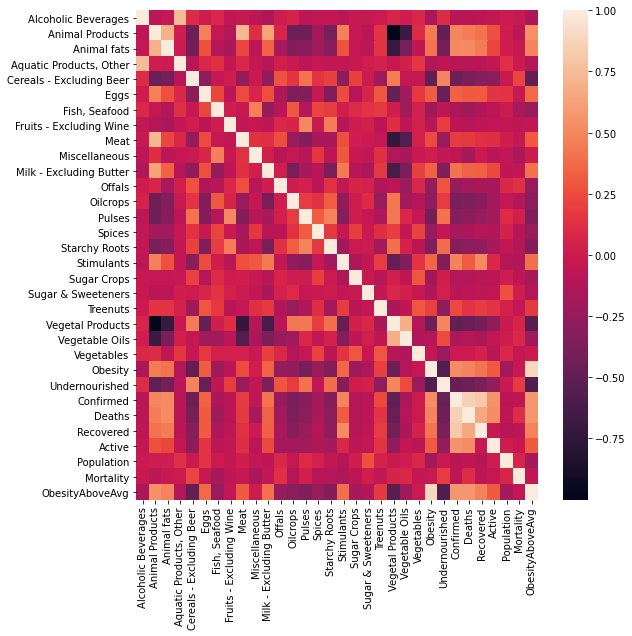

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr())
plt.show()

In [ ]:
features = data.columns.drop('Deaths')
target = 'Deaths'

print('Model features: ', features)
print('Model target: ', target)

Model features:  Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Recovered', 'Active',
       'Population', 'Mortality', 'ObesityAboveAvg'],
      dtype='object')
Model target:  Deaths


Training and test datasets
Target balancing

In [ ]:
features=['Alcoholic Beverages',	'Animal fats',	'Animal Products',	'Aquatic Products, Other',	'Cereals - Excluding Beer',	'Eggs'	,'Fish, Seafood',	
          'Fruits - Excluding Wine', 'Meat',	'Milk - Excluding Butter',	'Miscellaneous',	'Offals',	'Oilcrops',	'Pulses',	'Spices',	'Starchy Roots',
          'Stimulants',	'Sugar & Sweeteners', 'Sugar Crops',	
          'Treenuts',	'Vegetable Oils',	'Vegetables','Vegetal Products'
          ]
data.set_index("Country",inplace=True)
data[features] = data[features].astype(float)
data['Deaths'] = data['Deaths'].astype(float)


X = data[features]
y = data['Recovered']

y = y.apply(lambda x: 0 if x <= data["Recovered"].mean() else 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(data, y,test_size = 0.2, shuffle = True, random_state = 28)

Data preprocessing pipeline
First, we will do preprocessing on the training set. As there are no missing values, we will build a pipeline to scale features to have similar orders of magnitude by bringing all of them between 0 and 1 using MinMaxScaler and them apply a KNN classifier.

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

## Defining the pipeline

classifier = Pipeline([
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 3))
])

# Visualize the pipeline
from sklearn import set_config
set_config(display='diagram')
print(classifier)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, Mali to Albania
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alcoholic Beverages       123 non-null    float64
 1   Animal Products           123 non-null    float64
 2   Animal fats               123 non-null    float64
 3   Aquatic Products, Other   123 non-null    float64
 4   Cereals - Excluding Beer  123 non-null    float64
 5   Eggs                      123 non-null    float64
 6   Fish, Seafood             123 non-null    float64
 7   Fruits - Excluding Wine   123 non-null    float64
 8   Meat                      123 non-null    float64
 9   Miscellaneous             123 non-null    float64
 10  Milk - Excluding Butter   123 non-null    float64
 11  Offals                    123 non-null    float64
 12  Oilcrops                  123 non-null    float64
 13  Pulses                    123 non-null    float64
 14  Spices  

In [ ]:
y_train

Country
Mali          0
Bangladesh    0
Djibouti      0
Cabo Verde    1
Nicaragua     0
             ..
Angola        0
Cuba          0
Cambodia      0
Armenia       1
Albania       1
Name: Recovered, Length: 123, dtype: int64

In [ ]:
x_train.head()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Mortality,ObesityAboveAvg
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mali,0.0,34.9262,2.4390,0.0,24.1746,0.2654,0.8130,0.5974,11.3490,0.0498,19.4292,0.6304,6.7530,1.0950,0.2488,0.2654,0.0664,0.0000,0.0,2.6714,65.0738,28.3890,0.7632,7.1,6.3,0.040294,0.001669,0.029895,0.008730,20251000.0,0.041422,0
Bangladesh,0.0,19.6730,2.4738,0.0,13.9892,2.5328,4.3292,0.8540,3.6814,0.0294,6.4498,0.2356,1.2664,1.0896,2.1204,0.4418,0.0590,0.0294,0.0,0.5302,80.3122,59.2844,0.6184,3.4,14.7,0.316691,0.004823,0.284344,0.027524,169809000.0,0.015230,0
Djibouti,0.0,22.2130,2.7932,0.0,8.7954,0.4988,0.5820,0.2494,10.2420,0.2826,7.7146,0.3824,0.8646,1.1140,0.6318,0.0666,1.1306,0.0000,0.0,0.8314,77.7954,62.8980,0.9144,12.2,18.9,0.601316,0.006377,0.592308,0.002632,988000.0,0.010604,0
Cabo Verde,0.0,43.9156,8.5846,0.0,10.2636,1.6936,1.0512,0.3796,19.8408,0.3358,12.5702,0.1606,2.9638,0.9052,1.9418,0.1898,0.8322,0.0000,0.0,0.3504,56.0770,37.3312,0.6132,10.6,12.6,2.586331,0.024281,2.461151,0.100899,556000.0,0.009388,0
Nicaragua,0.0,35.9870,4.6618,0.0,18.4738,2.0160,0.8348,0.2678,15.2138,0.2204,13.0246,0.2204,3.8428,0.9292,0.0158,0.2048,0.8504,0.0000,0.0,0.0630,64.0208,38.7904,0.3622,21.8,17.0,0.095497,0.002577,0.064054,0.028866,6596000.0,0.026988,1


Training
First we train our classifier with the .fit() method.

In [ ]:
# Get train data

# Fit the classifier
classifier.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

Testing

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Using the fitted model to make predicitions on the training set

train_preds = classifier.predict(x_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_preds))
print(classification_report(y_train, train_preds))
print("Train accuracy:", accuracy_score(y_train, train_preds))

Model performance on the train set:
[[81  1]
 [ 2 39]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        82
           1       0.97      0.95      0.96        41

    accuracy                           0.98       123
   macro avg       0.98      0.97      0.97       123
weighted avg       0.98      0.98      0.98       123

Train accuracy: 0.975609756097561


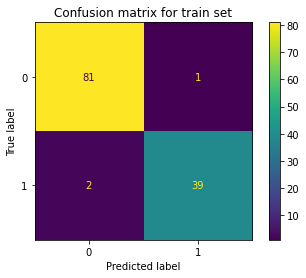

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, x_train, y_train)

disp.ax_.set_title('Confusion matrix for train set');

In [ ]:
# Get data to test classifier

test_preds = classifier.predict(x_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))
print("Test accuracy:", accuracy_score(y_test, test_preds))

Model performance on the test set:
[[18  3]
 [ 1  9]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.75      0.90      0.82        10

    accuracy                           0.87        31
   macro avg       0.85      0.88      0.86        31
weighted avg       0.88      0.87      0.87        31

Test accuracy: 0.8709677419354839


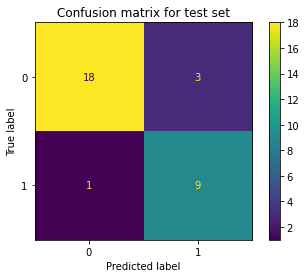

In [ ]:
disp = plot_confusion_matrix(classifier, x_test, y_test)

disp.ax_.set_title('Confusion matrix for test set');